### Optimization and Gradient Descent Lecture

F. Burkholder (credit T. Heilman and A. Richards)

The point of this lecture is expose you to what's happening behind the scenes when you are calling `.fit` on some of sklearn's machine learning models to determine model coefficients (a.k.a. $\beta$, $\theta$, parameters, weights)  

This same process also helps determine weights in a neural network - so we will revisit this topic when talk neural nets.  

Gradient Descent is not a machine learning model - it's a way of solving for coefficients (in some model) given coefficients that need to be determined, true and predicted target values (from the model that uses the coefficients), and a **cost function** that quantifies how different the the predicted and true values are across the training data.

Gradient Descent is one way of performing [mathematical optimization.](https://en.wikipedia.org/wiki/Mathematical_optimization)

# Optimization

Mathematical optimization includes finding "best available" values of some **objective function** given a defined domain (or input).

Example objective functions:
* The time spent on preparations before leaving your house so that you can arrive at work on time.
* Getting a job after the DSI given the time associated with all the work associated with graduation (assignments, case studies, capstones, mock interviews, career services, applying for jobs).
* Deciding what to do now so that you can retire at a young age.
* Finding the maximum or minimum of some mathematical function.

In an optimization problem you decide whether you are looking for the objective function's maximum or minimum.


## Optimization in machine learning

In [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning) our task is to choose a model, including its coefficients, that will train on existing data and then perform well on unseen data.

Here are two examples of objective functions in machine learning:

### Linear Regression

Find coefficients $\theta$ that **minimize** the mean squared residual:

$$ J(\theta) = \frac{1}{N}\sum_{i=1}^N (y_i - h_\theta(x_i))^2 $$  

$h_\theta(x)$ are the predictions of the model in this case, otherwise known as $\hat{y}$.

### Logistic Regression

In the case of binary classification (label is 0 or 1), find coefficients $\theta$ that **maximize** the likelihood of the classifying the true values correctly.

$$  L(\theta) = \sum_{i=1}^N (y_i \ln h_\theta (x_i) + (1- y_i)\ln(1- (h_\theta (x_i))) $$

Why the **maximum**?  Let's review what the natural logarithm looks like for values < 1:   [interactive chart](https://www.google.com/search?client=ubuntu&channel=fs&q=graph+of+natural+logarithm&ie=utf-8&oe=utf-8)

Note that $h_\theta(x)$ are the probability predictions of the model, all ranging from 0 to 1.  A threshold is used with these probabilities to make the prediction $\hat{y}$.  

Let's see how this loss function behaves on 2 datapoints when given a bad model (where the coefficients give a large loss) and a better model (where the coefficients give a lower loss).  

Recall: $y_i$ is the true value of the target ($i$ for the *ith* row), and $h_\theta (x_i)$ is the probability of the positive class (1) given the features $x_i$ in a logistic regression model of the form:

$$\ln \left( \frac{h_\theta (x)}{1 - h_\theta (x)} \right) = \beta_0 + \beta_1 \cdot X_1 + \beta_2 \cdot X_2 + ... \beta_p \cdot X_p$$


The "bad" model:  

|$$y_i$$   |  $$h_\theta (x_i)$$  |$$y_i \ln h_\theta (x_i)$$ | $$(1- y_i)\ln(1- h_\theta (x_i))$$ |$$L(\theta)$$ |
|:---:|:---:|:---:|:---:|:---:|
|0  |0.9 |  0 | -2.3  | -2.3  |
|1  |0.2 | -1.6 | 0   | -1.6  |
|   |    |      |     | -3.9  |  

And a better model (with different coefficients than the bad model):  

|$$y_i$$   |  $$h_\theta (x_i)$$  |$$y_i \ln h_\theta (x_i)$$ | $$(1- y_i)\ln(1- h_\theta (x_i))$$ |$$L(\theta)$$ |
|:---:|:---:|:---:|:---:|:---:|
|0  |0.2 |  0 | -0.2  | -0.2  |
|1  |0.9 | -0.1 | 0   | -0.1  |
|   |    |      |     | -0.3  |  

Note that the cost/loss is less for the model with better coefficients.

### Gradient descent - a way to find the coefficients.

[Gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) is a first-order iterative optimization algorithm for finding the minimum of a function.

To find a local minimum, one takes steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point.

$$ \beta_{new} = \beta_{old} - \alpha \cdot \frac{\nabla J}{\partial \beta}$$

$ \beta_{new} $ is the new estimate of the model coefficients  
$ \beta_{old} $ is the old estimate of the model coefficients  
$ \alpha $ is the learning rate, the tunable parameter that adjusts how much of a step is taken in the direction of the gradient  
$ \frac{\nabla J}{\partial \beta} $ is the gradient, a measure of how much the cost function is increasing with respect to each of the coefficients

## Gradient Descent in one dimension

Let's start with a simplified example, a cost function of $J(x) = 3x^2$  

$J$ is the cost, $x$ is the feature/coefficient/parameter that we are trying update to minimize $J$. 

Gradient descent requires: 
* cost function, $J$
* the gradient of the cost function, in this case $ \frac{\nabla J}{\partial x} $

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
np.set_printoptions(suppress=True)

In [2]:
def cost_func(x):
    return 3*x**2

def grad_cost_func(x):
    return 6*x

We know from calculus that we can find the minimum of this function at x = 0. 

For demonstation purposes, we pretend that we don't know this, and we will start with a guess of x = 5 for the minimum.

Let's plot this, for a visual...

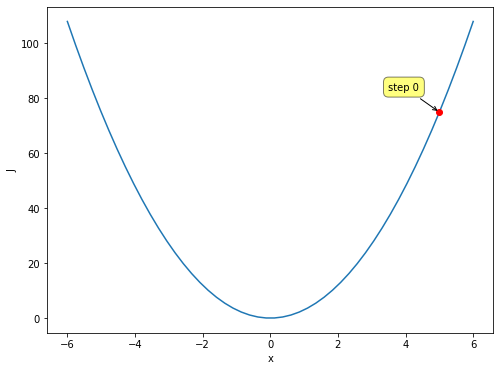

In [3]:
# keeping our guesses in a list for reasons that will become clear later....
guesses = [5]

def plot_cost(x_guess):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111) 
    x = np.linspace(-6, 6)
    y = cost_func(x)
    ax.plot(x, y)
    y_guess = [cost_func(xg) for xg in x_guess]
    ax.plot(x_guess, y_guess, 'ro')
    ax.set_xlabel('x')
    ax.set_ylabel('J')
    
    labels = ['step {}'.format(i) for i in range(len(x_guess))]
    for label, x, y in zip(labels, x_guess, y_guess):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-20, 20),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

   
plot_cost(guesses)

In this one-dimensional case, we can visually inspect and see that we are pretty far from the minimum! 

Let's compute the gradient at this point to update our "guess" for x 

In [4]:
grad = grad_cost_func(guesses[-1])
print(grad)

30


The gradient is huge at our guess! If we simply adjusted by that amount, we would overshoot the minimum by far! This is why we use the learning rate to adjust our guess by small steps. Let's try a learning rate of .05, so we don't go too far. Since we are doing gradient DESCENT, we should subtract the gradient from our guess. 

In [5]:
learning_rate = .05

guess_update = guesses[-1] - learning_rate*grad
# let's keep our guesses in a list...
guesses.append(guess_update)

print(guesses)

[5, 3.5]


Plot including our new guess...

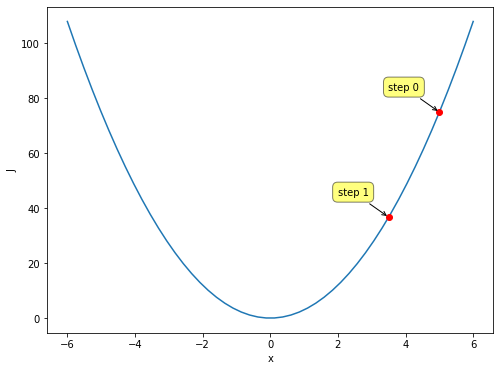

In [6]:
plot_cost(guesses)

That's a lot closer. Let's do this three more times and see where we land...

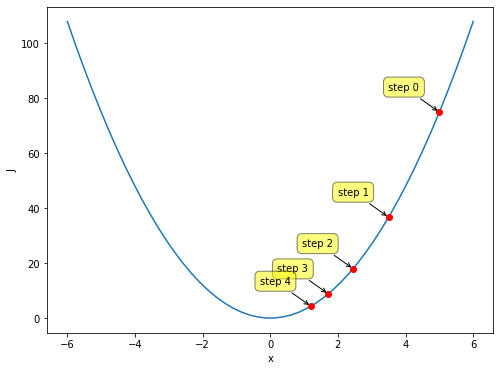

In [7]:
for _ in range(3):
    grad = grad_cost_func(guesses[-1])
    guess_update = guesses[-1] - learning_rate*grad
    guesses.append(guess_update)

plot_cost(guesses)

Note that as we get closer to the minimum, the gradient gets smaller and so the guesses step more slowly. This is a good thing - a natural property that makes it harder for us to overshoot!

Let's see if 5 more times does the job.

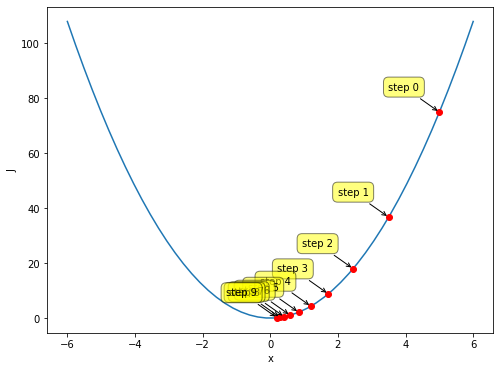

In [8]:
for _ in range(5):
    grad = grad_cost_func(guesses[-1])
    guess_update = guesses[-1] - learning_rate*grad
    guesses.append(guess_update)

plot_cost(guesses)

looks pretty close, let's inspect the list to see

In [9]:
print("#\tguess")
for i, guess in enumerate(guesses,1):
    print("{0}\t{1:0.3f}".format(i, guess))

#	guess
1	5.000
2	3.500
3	2.450
4	1.715
5	1.200
6	0.840
7	0.588
8	0.412
9	0.288
10	0.202


Didn't quite get to the minimum, but with more steps it would.

This was a simple example where there was only one coefficient to find (there was just one feature).  For most machine learning models, there are multiple features and therefore coefficients to find for each feature.

In this case you take a multi-dimensional derivative called the gradient.

##  Gradient Formula
* The gradient is the multivariate analogue of the derivative.

$$ \nabla f = \sum_{i=1}^P\frac{\partial f}{\partial x_i} \vec{e_i}$$

where:  
$ \nabla f$ is the gradient of function $f$  
$ \sum_{i=1}^P$ is the sum over all the predictors (columns) $P$  
$ \frac{\partial f}{\partial x_i}$ is the partial derivative of $f$ with respect to predictor $x_i$  
$ e_i$ indicates in the direction of the predictor $x_i$

Simple example.  Say there were columns $x$, $y$, and $z$ in our X array, 
defined to go in directions $\vec{i}, \vec{j}, \vec{k}$.  
So $$ \nabla f = \frac{\partial f}{\partial x} \vec{i} + \frac{\partial f}{\partial y} \vec{j}+ \frac{\partial f}{\partial z} \vec{k}$$

Say $$ f(x,y,z) = 2x + 3y^{2} - sin(3z) $$

The gradient is:  

$$ \nabla f = 2\vec{i} + 6y\vec{j} - 3cos(3z)\vec{k} $$


## Pair assignment

In your assignment today you'll be working through the gradient descent algorithm for logistic regression.  

In this notebook we'll work through an example using linear regression.

### First, recall the objective functions

#### Linear Regression

We want to find coefficients $\theta$ that *minimize* the mean squared residual:

$$ J(\theta) = \frac{1}{N}\sum_{i=1}^N (y_i - h_\theta(x_i))^2 $$

#### Logistic Regression

We want to find coefficients $\theta$ that *maximize* the likelihood of the classifying the true values correctly.

$$  L(\theta) = \sum_{i=1}^N (y_i \ln h_\theta (x_i) + (1- y_i)\ln(1- (h_\theta (x_i))) $$

$ h_\theta (x_i) $ is the predicted probability of the positive class.

To use gradient **descent** we would like to find a minimum instead of a maximum.  So we multiply the maximum likelihood by -1 to change the objective function in to a cost function.

$$  J(\theta) = -\sum_{i=1}^N (y_i \ln h_\theta (x_i) + (1- y_i)\ln(1- (h_\theta (x_i))) $$

This is equation is the [binary cross-entropy loss function](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a).  When it's extrapolated to more than two classes it's simply called [categorical cross entropy](https://machinelearningmastery.com/cross-entropy-for-machine-learning/).


### Linear regression using gradient descent demo
First, instantiate a small "dataset" X, with 2 features and 10 rows, and **true** beta coefficients (that gradient descent will determine later in the notebook). 

In [10]:
np.random.seed(1) # set random seed
nrows = 10
const = np.ones((nrows, 1))
x1 = np.random.random((nrows, 1))
X = np.hstack([const, x1])
# define true betas that will be used to calculate y
# the goal will be to converge on the true betas using X, y, and gradient descent
true_betas = np.array([3, 4]).reshape(-1, 1) # go ahead and turn this into a column vector 
print("The betas (or weights, or theta in cost functions above) gradient descent will try to find are:")
print(true_betas)

The betas (or weights, or theta in cost functions above) gradient descent will try to find are:
[[3]
 [4]]


In [11]:
X

array([[1.        , 0.417022  ],
       [1.        , 0.72032449],
       [1.        , 0.00011437],
       [1.        , 0.30233257],
       [1.        , 0.14675589],
       [1.        , 0.09233859],
       [1.        , 0.18626021],
       [1.        , 0.34556073],
       [1.        , 0.39676747],
       [1.        , 0.53881673]])

Typically we know our Xs and ys, but are actually trying to solve for the best values of beta. In this exampe the true beta values are used calculate y, and then X and y are used in gradient descent to try to determine what the beta values were.

Note - we already know the correct answer for our coefficients, which is a good way to practice our algorithm - we already know the correct answer!

In [12]:
y = np.dot(X,true_betas).reshape(-1, 1) # keep this as a column vector so linear algebra goes smoothly
print("X array:")
print(np.around(X,2))
print("\ny array:")
print(np.around(y,2))

X array:
[[1.   0.42]
 [1.   0.72]
 [1.   0.  ]
 [1.   0.3 ]
 [1.   0.15]
 [1.   0.09]
 [1.   0.19]
 [1.   0.35]
 [1.   0.4 ]
 [1.   0.54]]

y array:
[[4.67]
 [5.88]
 [3.  ]
 [4.21]
 [3.59]
 [3.37]
 [3.75]
 [4.38]
 [4.59]
 [5.16]]


In [13]:
# note that np.around did not change the values in the arrays
# but simple made it nice for displaying
y

array([[4.66808802],
       [5.88129797],
       [3.0004575 ],
       [4.20933029],
       [3.58702356],
       [3.36935438],
       [3.74504085],
       [4.38224291],
       [4.5870699 ],
       [5.15526694]])

### Steps for Gradient Descent

**1. Compute gradient of the cost function.**  
Compute the gradient (derivative) of this below. You may find it helpful to first think of it as just one row of data.

$$ J_i(\beta) = \frac{1}{2}((y_i - x_i \cdot \beta))^2 $$
where  

$ y_i $ is the ith y value (a scalar)  
$ x_i $ is a row vector of two values in this case (X has two columns): [$x_{i,0}$, $x_{i,1}$]  
$ \beta $ is a column vector of the coefficents: $[\beta_0, \beta_1]^T$  
$ x_i \cdot \beta $ is the dot product of these two vectors, yielding a scalar


Work it out on your own...

In [37]:
def gradient_one_coefficient_one_row(y_i, x_i, beta_guess, coeff_index):
    '''
    Parameters
    ----------
    y_i: one y value that is the target of the row x_i
    x_i: one row of X
    beta_guess: guess values for the 2 coefficients (2 row, 1 column vector)
    coeff_index: index (0 or 1) corresponding to which coefficient gradient applies to
    
    Returns:
    a one value non-dimensional array
    '''
    pass

<details><summary>
Click here for solution...
</summary>
```
def gradient_one_coefficient_one_row(y_i, x_i, beta_guess, coeff_index):
    return -1 * x_i[coeff_index] * (y_i - np.dot(x_i, beta_guess))
```
</details>

In [38]:
# guess betas
beta_guess = np.array([1, 1]).reshape(-1, 1)

## try it for one row of data
row = 1
x_i = X[row]
y_i = y[row]

grad_Beta0 = gradient_one_coefficient_one_row(y_i, x_i, beta_guess, 0)
grad_Beta1 = gradient_one_coefficient_one_row(y_i, x_i, beta_guess, 1)
print("Gradient of cost function wrt Beta0: ", grad_Beta0)
print("Gradient of cost function wrt Beta1: ", grad_Beta1)

Gradient of cost function wrt Beta0:  [-4.16097348]
Gradient of cost function wrt Beta1:  [-2.99725111]


Let's leverage numpy to calculate the gradients for both coefficients for all rows

In [39]:
def gradients_coefficients(y, X, beta_guess):
    return -1 * X * (y - np.dot(X, beta_guess))

In [40]:
beta_guess = np.array([1, 1]).reshape(-1, 1)

gradients = gradients_coefficients(y, X, beta_guess)
gradients

array([[-3.25106601, -1.35576607],
       [-4.16097348, -2.99725111],
       [-2.00034312, -0.00022879],
       [-2.90699772, -0.8788801 ],
       [-2.44026767, -0.35812366],
       [-2.27701578, -0.21025644],
       [-2.55878063, -0.47659902],
       [-3.03668218, -1.0493581 ],
       [-3.19030242, -1.26580823],
       [-3.6164502 , -1.94860389]])

Using **batch** gradient descent, we're going to accumulate the gradient for all rows of data first, and then make an update.  So we don't care about the gradient for each row - rather the accumulated gradient across all rows.  As each accumulated gradient will be applied to each coefficient, we want to return it as the same shape as the coefficients (a column vector).

In [41]:
def gradients_coefficients_accumulated(y, X, beta_guess):
    gradients = -1 * X * (y - np.dot(X, beta_guess))
    return gradients.sum(axis=0).reshape(-1, 1)

In [42]:
beta_guess = np.array([1, 1]).reshape(-1, 1)

gradients_accum = gradients_coefficients_accumulated(y, X, beta_guess)
gradients_accum

array([[-29.43887923],
       [-10.54087541]])

**Now, check out this serious numpy magic:**

In [43]:
def mse_grad_func(X, beta_guess, y):
    return np.dot(X.T, np.dot(X, beta_guess)-y)

In [44]:
beta_guess = np.array([1, 1]).reshape(-1, 1)

gradients_accum = mse_grad_func(X, beta_guess, y)
gradients_accum

array([[-29.43887923],
       [-10.54087541]])

**2. Adjust weights/parameters by the gradient of the cost function scaled by the learning rate** Update the betas given the gradient of the cost function that was just computed, scaled by the learning rate. This is gradient DESCENT, so we should subtract our update. 

Write a function that performs a parameter update and returns updated parameters (This is very simple - should be a one liner, use numpy. DO NOT OVERTHINK THIS!). Since our problem is simple, the default learning rate is (relatively) high at 0.02.

In [45]:
def paramater_update(betas, grad, lr=0.02):
    pass

<details><summary>
Click here for solution...
</summary>
```
def paramater_update(betas, grad, lr=0.02):
    return betas - lr * grad
```
</details>

**3. Compute objective function, a.k.a the cost function**  
We've done this. We are doing a linear regression, so we will use the mean squared error cost function. 
$$ J(\theta) = \frac{1}{N}\sum_{i=1}^N (y_i - h_\theta(x_i))^2 $$

**4. Check for convergence**  
More later.

<br>
<br>

**Using the gradient and the parameter update functions, you can perform simple gradient descent.**  
Start with guesses for beta

In [46]:
beta_guess = np.ones((2,1))
beta_guess

array([[1.],
       [1.]])

Set the iteration count

In [47]:
i = 0

Execute the cell below as many times as desired.

In [48]:
i += 1
print('Iteration {}'.format(i))
grad = mse_grad_func(X, beta_guess, y)
print('The gradient is: {0:0.2f}, {1:0.2f}'.format(grad[0][0], grad[1][0]))
beta_guess = paramater_update(beta_guess, grad)
print('New values of beta: {0:0.2f}, {1:0.2f}'.format(beta_guess[0][0], beta_guess[1][0]))
print('  Recall true beta: {0:0.2f}, {1:0.2f}'.format(true_betas[0][0], true_betas[1][0]))

Iteration 1
The gradient is: -29.44, -10.54
New values of beta: 1.59, 1.21
  Recall true beta: 3.00, 4.00


### Put it all together to implement simple gradient descent

In [49]:
def simple_gradient_descent(X, y, beta_guess = np.ones((2,1)), lr = .02, max_iter = 10): 
    for _ in range(max_iter):
        grad = mse_grad_func(X, beta_guess, y)
        beta_guess = paramater_update(beta_guess, grad, lr)
    return beta_guess

In [50]:
# does it find the right betas?
betas = simple_gradient_descent(X, y, max_iter = 1000)
print("Calculated betas: {}".format(np.around(betas.ravel(), decimals = 2)))
print("      True betas: {}".format(np.around(true_betas.ravel(), decimals = 2)))

Calculated betas: [3. 4.]
      True betas: [3 4]


### Gradient Descent Convergence Criterion
We did the simplest case of convergence criteria, a set number of iterations. In practice, you would want to use a more sophisticated convergence criterion - i.e. stopping iterations when your result stops significantly improving.

Copy and paste your function from above into the second block below, but improve it by adding the following stopping criteria in addition to maximum iterations. Feel free to adjust the default paramaters if you don't like the results.

* Change in cost function $ (cost_{old} - cost_{new}) / cost_{old} < \epsilon $

The stopping criteria requires the cost to be calculated.

In [51]:
def cost_function(X, y, beta_guess):
    return 1/X.shape[0] * np.sum((y - np.dot(X, beta_guess))**2)

In [52]:
def gradient_descent_with_conv(X, y, beta_guess = np.ones((2,1)), lr = .02,
                               max_iter = 10000, epsilon = 0.01): 
    cost_array = []
    for i in range(max_iter):
        cost_new = cost_function(X, y, beta_guess)
        cost_array.append(cost_new)
        if i > 2:
            cost_old = cost_array[-2]
            if abs(cost_old - cost_new)/cost_old < epsilon:
                print('Convergence met at iteration {0}.'.format(i))
                break
        grad = mse_grad_func(X, beta_guess, y)
        beta_guess = paramater_update(beta_guess, grad, lr)
    return beta_guess

In [53]:
betas = gradient_descent_with_conv(X, y, max_iter=10000, epsilon = 0.01)  # you may need to play with the learning rate, max_iter, and epsilon
print("Calculated betas: {}".format(np.around(betas.ravel(), decimals = 2)))
print("      True betas: {}".format(np.around(true_betas.ravel(), decimals = 2)))

Convergence met at iteration 3784.
Calculated betas: [3. 4.]
      True betas: [3 4]
